In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd

import datetime as dt
import seaborn as sns
from sqlalchemy import create_engine, inspect

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector=inspect(engine)

In [6]:
 # reflect an existing database into a new model

# reflect the tables

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
 # We can view all of the classes that automap found

In [9]:
Base.classes.keys()

['measurement', 'station']

In [10]:
columns = inspector.get_columns("measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
measurement=engine.execute('SELECT * FROM Measurement LIMIT 15')

In [12]:
measurement.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [13]:
columns = inspector.get_columns("station")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [14]:
station=engine.execute('SELECT * FROM Station')

In [15]:
station.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
 # Save references to each table

In [17]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB

In [19]:
session = Session(engine)

In [20]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [21]:
query = "SELECT max(date) FROM measurement"
engine.execute(query).fetchall()

[('2017-08-23',)]

In [22]:
oneyearago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', oneyearago_date)

Query Date: 2016-08-22


In [23]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= oneyearago_date).\
    order_by(Measurement.date).all()

In [24]:
score = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

In [25]:
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date","Precipitation"])
precipitation_df.set_index("Date", inplace=True,)
precipitation_df.head()

,Precipitation
Date,
2016-08-22,0.40
2016-08-22,0.94
2016-08-22,NaN
2016-08-22,NaN
2016-08-22,0.40


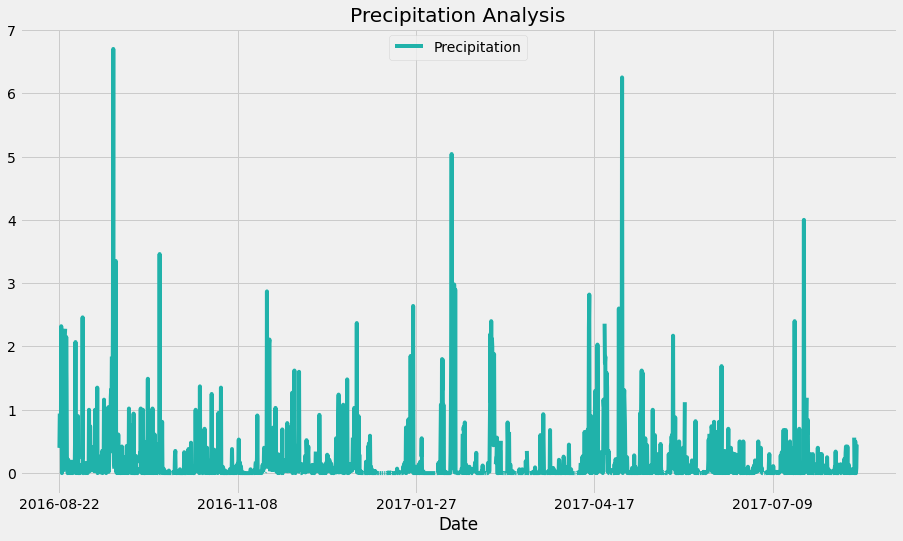

In [26]:
precipitation_df.plot(title="Precipitation Analysis", figsize=(14,8),color='lightseagreen')
plt.legend(loc='upper center')
plt.show()

In [27]:
 # Use Pandas to calcualte the summary statistics for the precipitation data

In [28]:
precipitation_df.describe()

,Precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
 # Design a query to show how many stations are available in this dataset?

In [30]:
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations in this dataset.')

There are 9 stations in this dataset.


In [31]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [62]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [64]:
t_result=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'lowest_temp', 
                                                          'highest_temp', 'average_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

,lowest_temp,highest_temp,average_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [65]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

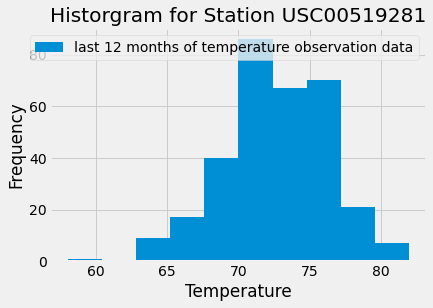

In [66]:
# Choose the station with the highest number of temperature observations.
highestemp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.prcp > 0).first()
highestemp

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempslast12months = session.query(Measurement.date, Measurement.tobs).filter(Measurement.prcp > 0).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
tempslast12months_dict = dict(tempslast12months)
tempslast12months_dates = list(tempslast12months_dict.keys())
tempslast12months_temps = list(tempslast12months_dict.values())



plt.hist(tempslast12months_temps)
plt.title("Historgram for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['last 12 months of temperature observation data'])
plt.show()

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
 # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [72]:
start_date='2017-08-05'
end_date='2017-08-15'

def calc_temps(start_date,end_date):
    
    return (session.query(func.min(Measurement.tobs), 
                          func.round(
                          func.avg(Measurement.tobs)), 
                          func.max(Measurement.tobs))
                   .filter(Measurement.date >= start_date)
                   .filter(Measurement.date <= end_date)
                   .all())

trip_temp=calc_temps(start_date,end_date)

your_trip_temp_df=pd.DataFrame({'start_date': start_date,
                           'end_date': end_date,
                           'tmin': [trip_temp[0][0]],
                           'tavg': [trip_temp[0][1]],
                           'tmax': [trip_temp[0][2]]
                          })
your_trip_temp_df.set_index(['start_date','end_date'],inplace=True)
your_trip_temp_df

,,tmin,tavg,tmax
start_date,end_date,,,
2017-08-05,2017-08-15,70.0,79.0,84.0


In [73]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

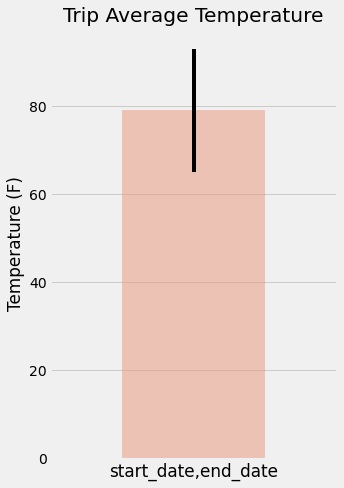

In [77]:
your_trip_temp_df.plot.bar(y="tavg", yerr=(your_trip_temp_df["tmax"] - your_trip_temp_df["tmin"]), 
                    title="Trip Average Temperature", color="darksalmon", 
                    alpha=0.5, figsize=(5,7), legend=None)
plt.xticks([])
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.show()

In [80]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfallPerweatherStation = session.query(Station.name, Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).group_by(Measurement.station).filter(Station.station == Measurement.station).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()

rainfall_df = pd.DataFrame(rainfallPerweatherStation, columns = ['Name', 'Station', 'Rainfall', 'Latitude', 'Longitude', 'Elevation'])
rainfall_df

,Name,Station,Rainfall,Latitude,Longitude,Elevation
0,"KANEOHE 838.1, HI US",USC00513117,48.51,21.42340,-157.80150,14.6
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,33.24,21.52130,-157.83740,7.0
2,"MANOA LYON ARBO 785.2, HI US",USC00516128,147.81,21.33310,-157.80250,152.4
3,"PEARL CITY, HI US",USC00517948,4.59,21.39340,-157.97510,11.9
4,"WAIHEE 837.5, HI US",USC00519281,70.03,21.45167,-157.84889,32.9
5,"WAIKIKI 717.2, HI US",USC00519397,16.09,21.27160,-157.81680,3.0
6,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,38.01,21.33556,-157.71139,19.5


In [81]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [110]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [121]:
dates =['2017-01-03', '2017-01-04', '2017-01-05']


df_all = pd.DataFrame()
for date in dates:
    query = f"""
                SELECT
                    min(tobs) as min_temp,
                    avg(tobs) as avg_temp,
                    max(tobs) as max_temp
                FROM
                    measurement
                where
                    date like '%{date[5:]}%'
                order by
                    date
            """
    df = pd.read_sql(query, con=db)
    df["date"] = date
    df_all = df_all.append(df)
    
df_all.head(10)

,min_temp,avg_temp,max_temp,date
0,62.0,68.909091,77.0,2017-01-03
0,58.0,70.000000,76.0,2017-01-04
0,56.0,67.964286,76.0,2017-01-05


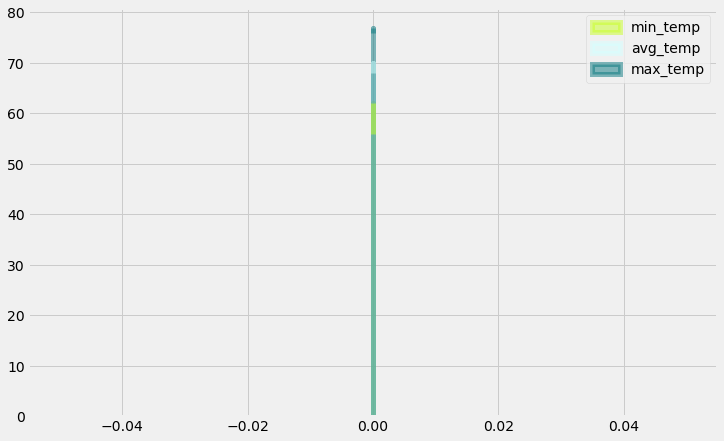

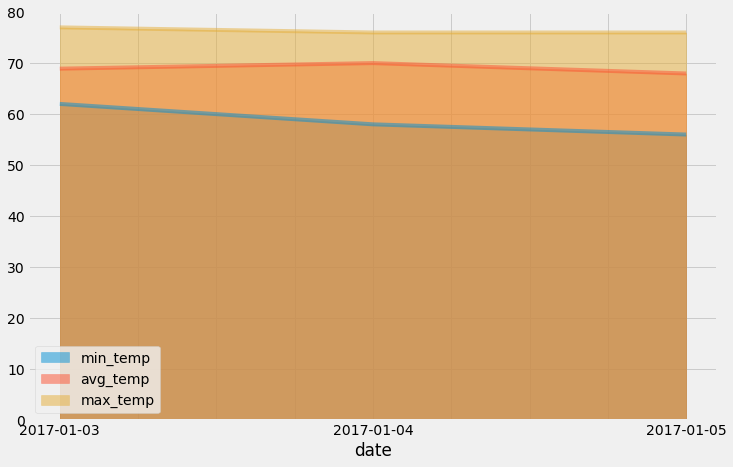

In [122]:
plt.rcParams['figure.figsize']=(11,7)
colors=['xkcd:green yellow','xkcd:very light blue','xkcd:deep aqua']
df_all.plot.area(linewidth=5,stacked=False,rot=0,alpha=0.5,color=colors);


df_all.set_index(["date"]).plot.area(stacked=False)
plt.ylim([0,80])
plt.show()

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
 # Plot the daily normals as an area plot with `stacked=False`

In [112]:
# normals_for_trip2_df=pd.DataFrame(normals,columns=['min_temp','avg_temp','max_temp'],
#                                    index=trip_dates)

# normals_for_trip2_df.index.name='date'
# ValueError: Shape of passed values is (22, 3), indices imply (10, 3)?? what does that mean??